# Data

We will start by loading the Advertising data set for Linear Regression, using sales as the target variable.

In [8]:
from ml import boston_pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [9]:
df = boston_pd()

In [10]:
y = df.price
X = df[['lstat']]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2)

SGDRegressor is a Gradient Descent variant of Linear Regression.

In [11]:
model = SGDRegressor()

In [12]:
model.fit(train_X, train_y)

SGDRegressor()

We can compute the squared error metric ourselves by predicting values for a data set and generating a List of squared errors. We can check to see if we have the right outcome by comparing to the loss of the model, beacuse in this case the loss is the sum of squared errors.

In [13]:
pred_y = model.predict(train_X)

se = [ (yp - y)**2 for y, yp in zip(train_y, pred_y) ]
sum(se)

18047.915012598027

We can also analyze which cases perform worse. We can use numpy's `argsort` function to find the indices of the data points that perform worse. When we plot the data we reveal where the worst data points are.

In [14]:
worst5 = np.array(se).argsort()[::-1][:5]
worst5

array([ 49, 190, 388, 213,   7])

Show the points with the worst predictions

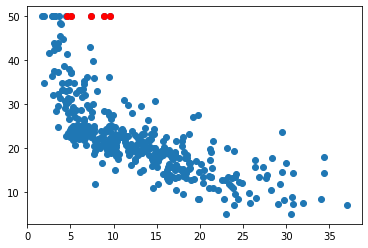

In [23]:
from matplotlib import pyplot as plt
plt.scatter(train_X, train_y)
plt.scatter(train_X.iloc[worst5], train_y.iloc[worst5], color='red');